Test Point: [ 0.81130447 -0.80201291]
Computed Nearest Neighbors (k=5): [76 73 45 78 35]
Classes of Neighbors: [1 1 1 1 1]
Predicted Class for Test Point: 1
Sklearn Predicted Class: 1


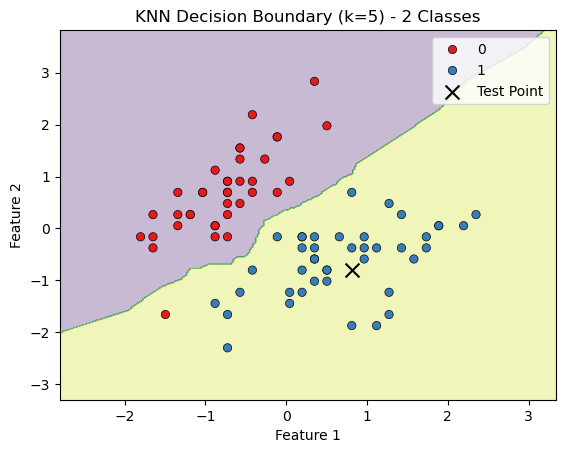

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, :2]  # Selecting first two features
y = iris.target

X = X[y != 2]  
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choose a test sample
test_point = X_test[0]  
print("Test Point:", test_point)

# Compute Euclidean distances manually from test point to all training points
distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))

# Get indices of 5 nearest neighbors
k = 5
nearest_neighbors = np.argsort(distances)[:k]

nearest_labels = y_train[nearest_neighbors]

predicted_class = np.bincount(nearest_labels).argmax()

print(f"Computed Nearest Neighbors (k={k}):", nearest_neighbors)
print(f"Classes of Neighbors: {nearest_labels}")
print(f"Predicted Class for Test Point: {predicted_class}")

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

predicted_sklearn = knn.predict([test_point])[0]
print(f"Sklearn Predicted Class: {predicted_sklearn}")

def plot_decision_boundary(X, y, model, test_point):
    h = .02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', edgecolor='k')

    # Mark test point
    plt.scatter(test_point[0], test_point[1], color='black', marker='x', s=100, label="Test Point")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"KNN Decision Boundary (k={k}) - 2 Classes")
    plt.legend()
    plt.show()

# Plot the result
plot_decision_boundary(X_train, y_train, knn, test_point)
